In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded =files.upload()

Saving salary.csv to salary.csv


In [ ]:
dataset = pd.read_csv("salary.csv")

In [ ]:
print(dataset.shape)

(32561, 5)


In [ ]:
print(dataset.head(9))

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
5   34              9             0              45  <=50K
6   38              6             0              40  <=50K
7   74             16             0              20   >50K
8   68              9             0              40  <=50K


In [ ]:
income_set= set(dataset['income'])
dataset['income'] = dataset['income'].map({'>=50k':1,'=<50k':0}).fillna(0).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       0
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [ ]:
x=dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train,x_test)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]] [[ 1.27591266 -1.98305776 -0.14509813 -0.03923011]
 [-1.43485534 -0.42608063 -0.14509813 -1.25599461]
 [-1.14179934 -0.03683634 -0.14509813 -0.44481828]
 ...
 [ 0.39674466 -0.03683634 -0.14509813  1.1775344 ]
 [ 1.42244067 -0.42608063 -0.14509813  0.77194623]
 [ 1.20264866 -0.03683634 -0.14509813  0.36635806]]


In [ ]:
!pip install scikit-learn

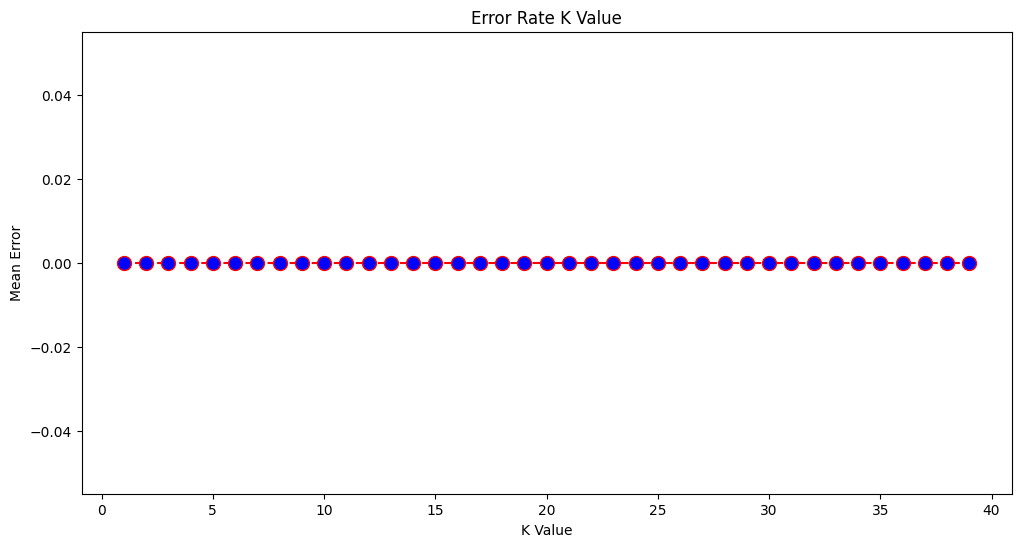

In [ ]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i=model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

# Create the plot outside the loop
plt.figure(figsize=(12,6)) # Moved outside the loop
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10) # Corrected 'market' to 'marker'
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show() # Added to display the plot

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,metric ='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
age=int(input("Enter the age:"))
edu = int(input("Enter the education:"))
cg=int(input("Enter the capital gain:"))
wh=int(input("Enter the hours per week:"))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Income is greater than 50k")
else:
  print("Income is less than 50k")

Enter the age:45
Enter the education:12
Enter the capital gain:4544
Enter the hours per week:40
[0]
Income is less than 50k
